# <font color = 'purple'> Linear SVC
Predicting presence of heart disease using linear support vector machine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
os.chdir(r"C:\Users\sharo\Documents\Postgrad\My Data Science Portfolio\Classification - Heart Disease")
os.getcwd()

'C:\\Users\\sharo\\Documents\\Postgrad\\My Data Science Portfolio\\Classification - Heart Disease'

In [3]:
sns.set_style('whitegrid')

In [4]:
my_seed = 101

## <font color = 'blue'> Reserve test data
Test data will not be used for model training or hyperparameter tuning, itstead it is reserved for final evaluation of model performance.

In [15]:
def get_train_test_df(fp, label_colname, my_seed=None):
    """
    Function to import raw data, carry out pre-processing, and split into training and test datasets.
    Test data will be reserved for final evaluation of model performance (i.e. not for hyperparameter tuning)
    
    :param fp: filepath
    :param label_colname: name of column containing labels
    :param my_seed: integer to be used to fix random state for train_test_split
    
    :return: tuple of dataframes - training_df, test_df
    """

    # import data
    df = pd.read_csv(fp)

    # one-hot encoding of categorical variables
    df = pd.get_dummies(df, drop_first=True)

    # Standard scaling of features
    scaler = StandardScaler()
    df[df.drop(columns=label_colname).columns] = scaler.fit_transform(df[df.drop(columns=label_colname).columns])


    # separate into training & test datasets. 
    # Stratification is used to ensure training and test sets have representative proportions of all classes
    training_df, test_df = train_test_split(df, test_size=0.2, random_state=my_seed, stratify=df[label_colname])

    return training_df, test_df

In [16]:
training_df, test_df = get_train_test_df(fp = "heart_clean.csv", label_colname='HeartDisease', my_seed = my_seed)

## <font color = 'blue'>Train Model

In [17]:
training_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease,ST_Slope_Flat,ST_Slope_Up,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
414,0.052026,-0.141240,-0.009695,-1.052500,1.981759,1.812470,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,1.213136
6,-0.902124,-0.141240,-0.140981,1.304764,-0.831502,-0.551733,0,-1.001091,1.149573,-1.936826,2.073784,-0.531524,-0.22981,0.815013,-0.490781,-0.824310
529,-0.372041,0.025520,-0.497329,-0.345321,0.200027,-0.551733,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,1.213136
225,-0.372041,0.692560,0.365409,0.519009,-0.831502,-0.551733,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,-0.824310
412,0.264059,-0.419173,-0.009695,-1.327514,0.106251,1.812470,1,0.998910,-0.869888,0.516309,-0.482210,-0.531524,-0.22981,0.815013,-0.490781,1.213136


In [18]:
X_train = training_df.drop(columns = 'HeartDisease').to_numpy()
X_train.shape

(733, 15)

In [19]:
y_train = training_df['HeartDisease'].to_numpy()
y_train.shape

(733,)

### Hyperparameter tuning through cross-validation

In [20]:
parameters = {'loss':['hinge', 'squared_hinge'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

svc = LinearSVC(max_iter=1e6, penalty='l2') #instantiate
model = GridSearchCV(svc, parameters, refit=False, cv=5)
model.fit(X_train, y_train)

C:\Users\sharo\anaconda3\envs\sklearn\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=1000000.0),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             refit=False)

In [21]:
results = pd.DataFrame.from_dict(model.cv_results_)[['param_loss', 'param_C', 'mean_test_score', 'rank_test_score']]
results['lg_C'] = results.param_C.apply(lambda x: np.log10(x))
results.sort_values(['param_loss', 'rank_test_score'])

,param_loss,param_C,mean_test_score,rank_test_score,lg_C
4,hinge,0.01,0.856798,1,-2.0
8,hinge,1,0.851347,4,0.0
10,hinge,10,0.849986,5,1.0
6,hinge,0.1,0.848625,8,-1.0
12,hinge,100,0.847265,11,2.0
2,hinge,0.001,0.844525,12,-3.0
0,hinge,0.0001,0.841776,14,-4.0
3,squared_hinge,0.001,0.854058,2,-3.0
5,squared_hinge,0.01,0.852679,3,-2.0
7,squared_hinge,0.1,0.849949,6,-1.0


<AxesSubplot: xlabel='lg_C', ylabel='mean_test_score'>

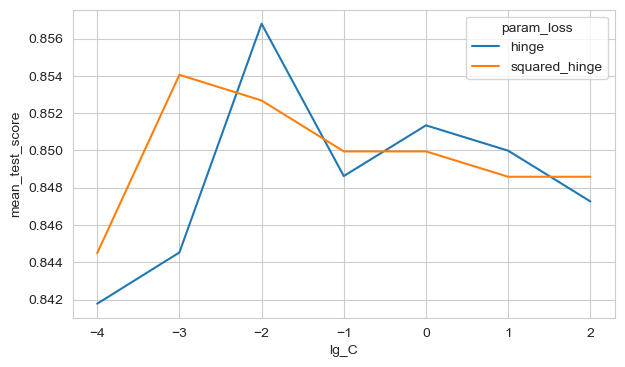

In [22]:
fig, ax = plt.subplots(figsize=(7,4))
sns.lineplot(data=results, x='lg_C', y='mean_test_score', hue='param_loss', ax=ax, errorbar=None)

Narrow search range for C to 1e-3 to 1e-1

In [23]:
parameters = {'loss':['hinge', 'squared_hinge'], 
              'C':np.arange(1e-3, 1e-1, 0.5e-3)}

svc = LinearSVC(max_iter=1e6, penalty='l2') #instantiate
model = GridSearchCV(svc, parameters, refit=False, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=1000000.0),
             param_grid={'C': array([0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045,
       0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 , 0.0085,
       0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115, 0.012 , 0.0125,
       0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155, 0.016 , 0.0165,
       0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195, 0.02  , 0.0205,
       0.021 , 0.021...
       0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755, 0.076 , 0.0765,
       0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795, 0.08  , 0.0805,
       0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835, 0.084 , 0.0845,
       0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875, 0.088 , 0.0885,
       0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915, 0.092 , 0.0925,
       0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955, 0.096 , 0.0965,
       0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995]),
                         'loss': ['hinge', 'squared_hinge']},
             refit=False)

<AxesSubplot: xlabel='param_C', ylabel='std_test_score'>

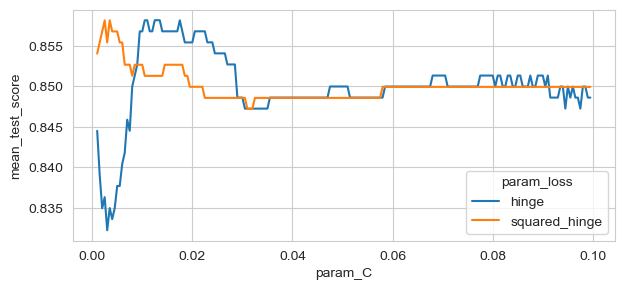

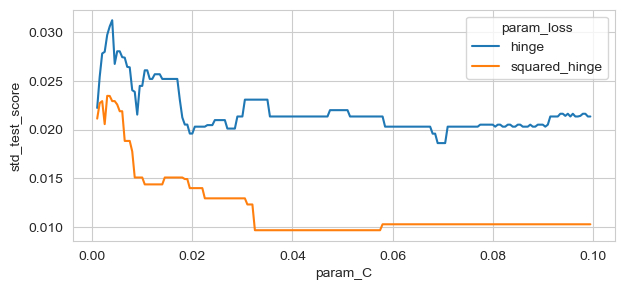

In [24]:
results = pd.DataFrame.from_dict(model.cv_results_)[['param_loss', 'param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']]

fig, ax = plt.subplots(figsize=(7,3))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_loss', ax=ax, errorbar=None)

fig, ax = plt.subplots(figsize=(7,3))
sns.lineplot(data=results, x='param_C', y='std_test_score', hue='param_loss', ax=ax, errorbar=None)

Optimised squared hinge is able to achieve similar accuracy with lower variance. Use squared hinge with C=0.02 to strike a balance between achieving higher mean accuracy and lower variance in accuracy.

### Train Final Model

In [25]:
svc_final = LinearSVC(max_iter=1e6, penalty='l2', loss='squared_hinge', C=0.02)
svc_final.fit(X_train, y_train)

LinearSVC(C=0.02, max_iter=1000000.0)

In [26]:
#check training accuracy
print(f"Mean Training Accuracy = {round(svc_final.score(X_train, y_train)*100,2)}%")

Mean Training Accuracy = 86.08%


## <font color = 'blue'> Test

In [27]:
X_test = test_df.drop(columns = 'HeartDisease').to_numpy()
X_test.shape

(184, 15)

In [28]:
y_test = test_df['HeartDisease'].to_numpy()
y_test.shape

(184,)

In [29]:
#check test accuracy
print(f"Mean Test Accuracy = {round(svc_final.score(X_test, y_test)*100,2)}%")

Mean Test Accuracy = 88.04%


## <font color = 'blue'> Examine Coefficients

In [40]:
coeff = pd.DataFrame.from_dict({'feature':list(test_df.drop(columns='HeartDisease').columns), 'coefficient':svc_final.coef_[0]})
coeff['abs_coeff'] = coeff.coefficient.apply(lambda x: np.abs(x))
coeff.sort_values('abs_coeff', ascending=False, inplace=True)
coeff

,feature,coefficient,abs_coeff
10,ChestPainType_NAP,-0.218689,0.218689
9,ChestPainType_ATA,-0.212812,0.212812
7,ST_Slope_Up,-0.211244,0.211244
5,FastingBS,0.167962,0.167962
8,Sex_M,0.166972,0.166972
6,ST_Slope_Flat,0.164991,0.164991
14,ExerciseAngina_Y,0.152757,0.152757
4,Oldpeak,0.091670,0.091670
11,ChestPainType_TA,-0.073636,0.073636
0,Age,0.064848,0.064848


<AxesSubplot: xlabel='coefficient', ylabel='feature'>

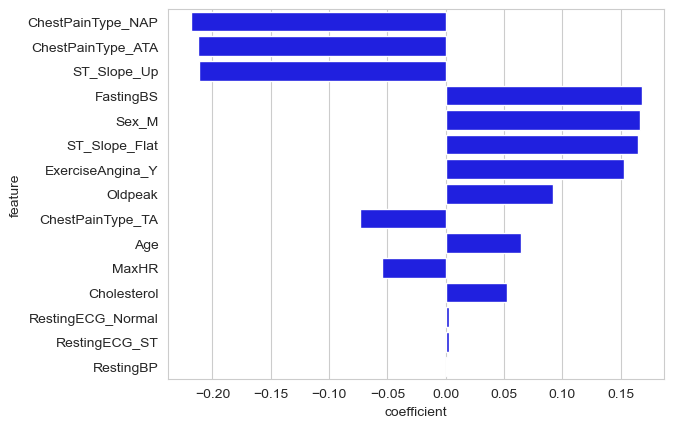

In [45]:
sns.barplot(data=coeff, x='coefficient', y='feature', order=coeff['feature'], color='blue')

Non-anginal chest pain, atypical angina and an upward slope in the ST segment during exercise were the strongest indicators **against** the presence of heart disease.

High fasting blood sugar, being male, and having a flat slope in the ST segment during exercise were the strongest indiactors **for** the presence of heart disease.

Least significant features were resting BP and ECG results.